In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'panel'

In [3]:
#type(api_URL)
zillow_url = "https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"

file_path = zillow_url
inventory = pd.read_csv(file_path)
inventory.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,243122.0,...,1198593.0,1184952.0,1174185.0,1169911.0,1166749.0,1166177.0,1168951.0,1165854.0,1162883.0,1159148.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,203130.0,...,473656.0,474728.0,475002.0,475503.0,476854.0,478986.0,481919.0,484905.0,487859.0,490856.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,225811.0,...,1111077.0,1120212.0,1124321.0,1127056.0,1126225.0,1128253.0,1138576.0,1138269.0,1132154.0,1120459.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199254.0,...,333667.0,334765.0,335858.0,336775.0,337577.0,339043.0,340610.0,343045.0,345999.0,350187.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,275953.0,...,618484.0,618119.0,617926.0,618015.0,619265.0,620926.0,623986.0,627034.0,630416.0,633821.0


In [4]:
inventory_filter = [column for column in inventory if column.startswith (("StateName","City","Metro","RegionName","2020", "2019"))]
inventory_2020_NY = inventory[inventory_filter]
inventory_2020_NY.set_index(["RegionName"], inplace = True)
inventory_2020_NY.head()

,StateName,City,Metro,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,NY,New York,New York-Newark-Jersey City,1372568.0,1379656.0,1399657.0,1388618.0,1383459.0,1364448.0,1348350.0,...,1198593.0,1184952.0,1174185.0,1169911.0,1166749.0,1166177.0,1168951.0,1165854.0,1162883.0,1159148.0
60657,IL,Chicago,Chicago-Naperville-Elgin,480506.0,477540.0,475611.0,475502.0,476080.0,476186.0,476502.0,...,473656.0,474728.0,475002.0,475503.0,476854.0,478986.0,481919.0,484905.0,487859.0,490856.0
10023,NY,New York,New York-Newark-Jersey City,1116613.0,1094406.0,1096265.0,1088971.0,1088376.0,1085627.0,1086185.0,...,1111077.0,1120212.0,1124321.0,1127056.0,1126225.0,1128253.0,1138576.0,1138269.0,1132154.0,1120459.0
77494,TX,Katy,Houston-The Woodlands-Sugar Land,334504.0,334351.0,334392.0,333568.0,333021.0,333074.0,334010.0,...,333667.0,334765.0,335858.0,336775.0,337577.0,339043.0,340610.0,343045.0,345999.0,350187.0
60614,IL,Chicago,Chicago-Naperville-Elgin,629667.0,626303.0,624495.0,625518.0,626061.0,625898.0,625663.0,...,618484.0,618119.0,617926.0,618015.0,619265.0,620926.0,623986.0,627034.0,630416.0,633821.0


In [7]:
# Load .env enviroment variables
load_dotenv("key.env")
# Retrieve API key and store as Python variable
api_key = os.getenv("QUANDL_API_KEY")
#type(api_key)
api_key

Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 6


'p5Z_b_bZ2x9yTzmAcycN'

In [8]:
# Crypto API URLs
iyr_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"


<AxesSubplot:ylabel='Frequency'>

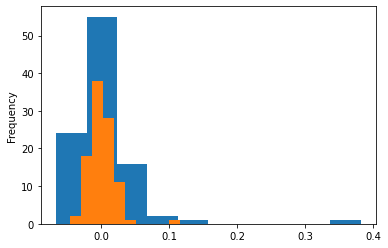

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
# Set the Empire Estate Realty Trust and Invesco S&P 500® Equal Weight Real Estate ETF tickers
ticker = ["ESRT","EWRE"]
# Set timeframe to '1D'
timeframe = "1D"
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()
# Get 2 year's worth of historical data Empire Estate Realty Trust and Invesco S&P 500® Equal Weight Real Estate ETF tickers
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker.head(10)
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()
# Fetch the closing prices of KO and TSLA
df_closing_prices["ESRT"] = df_ticker["ESRT"]["close"]
df_closing_prices["EWRE"] = df_ticker["EWRE"]["close"]
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
# Display sample data
df_daily_returns.head(10)
# Generate descriptive statistics
df_daily_returns.describe()
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns["ESRT"].plot.hist()
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns["EWRE"].plot.hist()

In [ ]:
x = inventory_2020_NY.corr

In [14]:
corr = df_daily_returns["ESRT"].corr(df_daily_returns['EWRE'])
corr

0.8162425466256787

In [16]:
df_daily_returns.corr()

,ESRT,EWRE
ESRT,1.000000,0.816243
EWRE,0.816243,1.000000


<AxesSubplot:>

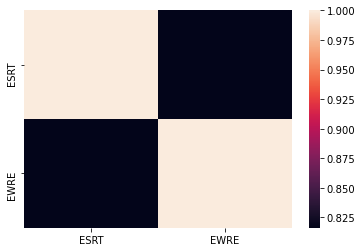

In [18]:
import seaborn as sns

sns.heatmap(df_daily_returns.corr())